# Exercises in Data Transformation and Exploratory Data Analysis

This notebook contains the exercises for the class of February 5, 2025, in the course Data & Things at Roskilde University.

 You need to explain what the data is about, which variables the 
dataset contains and what their data type is. Moreover, for each individual variable you 
should investigate/explain its distribution/variation through visualization and descriptive 
statistics. Finally, you should investigate/explain the variation/correlation between pairs of 
variables – here it is enough to investigate three pairs of variables, one where both 
variables are categorical, one where both variables are numeric, and one where one of the 
variable is categorical and the other is numeric. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 3

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

In [2]:
from ucimlrepo import fetch_ucirepo 
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 
X["income"] = y
adult_data = X.copy()

adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Checking for missing values

In [3]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


There's a few missing values in `Workclass` and `occupation`. In this case we wont deal with these. Above is the variables datatypes, we can see that there's 9 objects and 6 integers

### Variation within a variable

I will now look through all the variables and look for variations

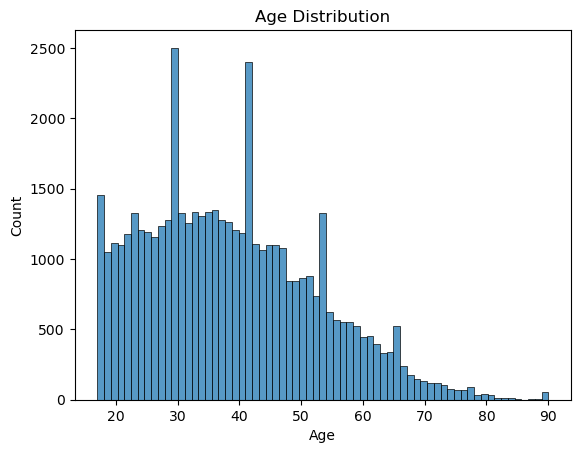

In [4]:
sns.histplot(x = "age", data = adult_data)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [5]:
adult_data["age"].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

As we can see from the describe function, the age doesn't seem to be skewed, since the median and the mean is almost the same

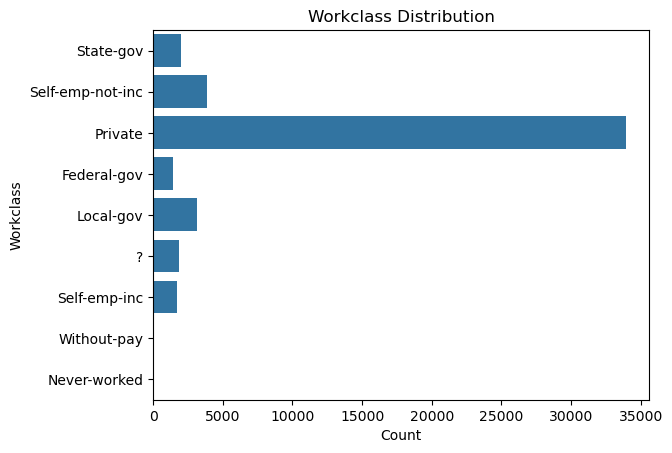

In [6]:
sns.countplot(y = "workclass", data = adult_data)
plt.title("Workclass Distribution")
plt.xlabel("Count")
plt.ylabel("Workclass")
plt.show()

In [7]:
adult_data["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

As we can see private has the most entries

### Fnlwgt

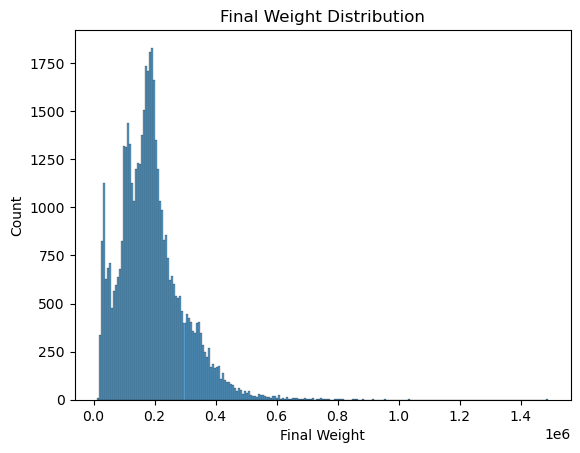

In [8]:
sns.histplot(x = "fnlwgt", data = adult_data)
plt.title("Final Weight Distribution")
plt.xlabel("Final Weight")
plt.ylabel("Count")
plt.show()

In [9]:
adult_data["fnlwgt"].describe().apply(lambda x: format(x, 'f'))

count      48842.000000
mean      189664.134597
std       105604.025423
min        12285.000000
25%       117550.500000
50%       178144.500000
75%       237642.000000
max      1490400.000000
Name: fnlwgt, dtype: object

The mean and the median is somewhat close, so the data is not that skewed.
The format specifier 'f' indicates that the value should be formatted as a fixed-point number, which is a way of representing real numbers that keeps a fixed number of digits after the decimal point.

### Education

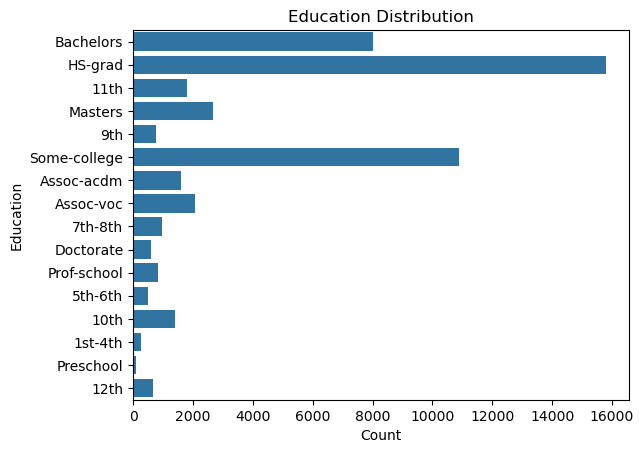

In [10]:
sns.countplot(y = "education", data = adult_data)
plt.title("Education Distribution")
plt.xlabel("Count")
plt.ylabel("Education")
plt.show()

In [11]:
adult_data["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

As we can see from the describe function, most of the data entries are either High School, College or Bachelors

### education-num

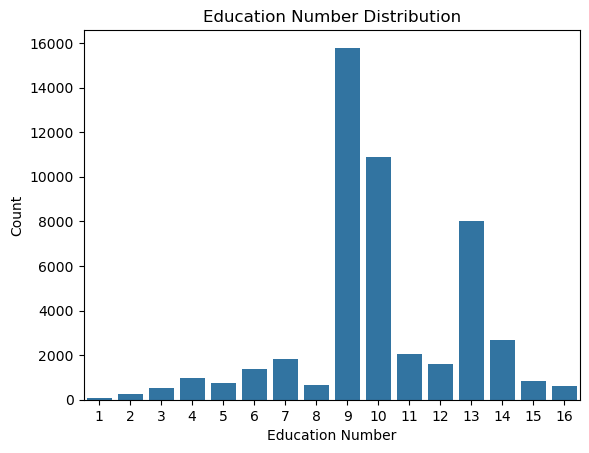

In [12]:
sns.countplot(x = "education-num", data = adult_data)
plt.title("Education Number Distribution")
plt.xlabel("Education Number")
plt.ylabel("Count")
plt.show()

In [13]:
adult_data["education-num"].value_counts()

education-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

As we can see here, the education number is just the numbers that correspond to the education as seen before. The numbers also shows the highest degree possible. Meaning that number 16 is the doctorate and number 1 is pre school

### Marital-status

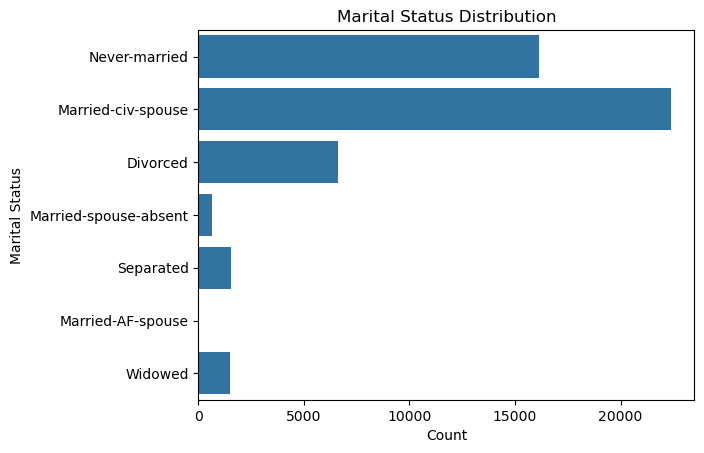

In [14]:
sns.countplot(y="marital-status", data=adult_data)
plt.title("Marital Status Distribution")
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.show()

In [15]:
adult_data["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

As we can see from the data, most people are either married or never married

### Occupation

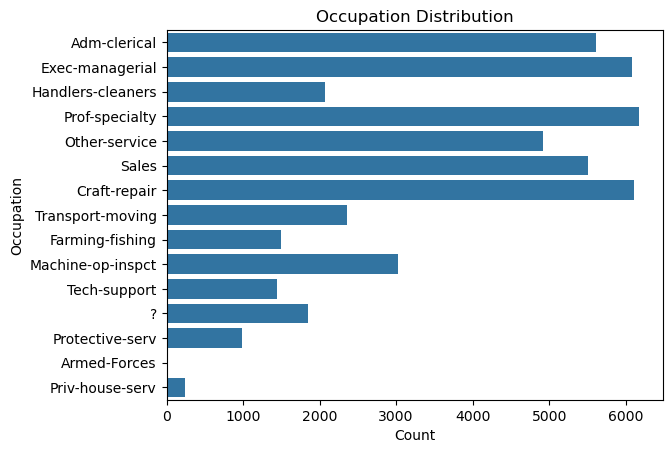

In [16]:
sns.countplot(y="occupation", data=adult_data)
plt.title("Occupation Distribution")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()

In [17]:
adult_data["occupation"].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

Here the distribution of the occupations doesn't vary too much. Even though the education numbers varied more

### Relationship

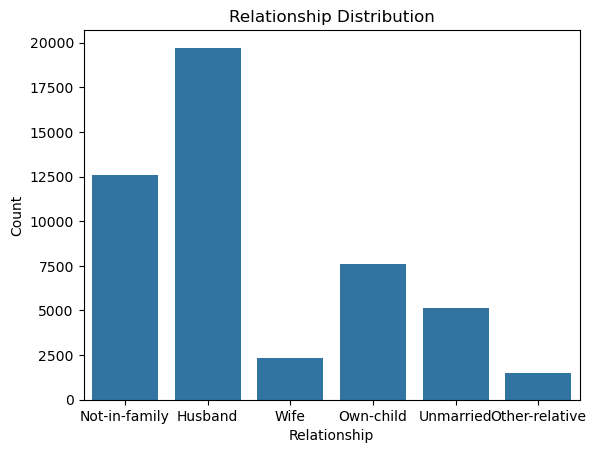

In [18]:
sns.countplot(x="relationship", data=adult_data)
plt.title("Relationship Distribution")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.show()

In [19]:
adult_data["relationship"].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

From the describe we can assume that most of the data entries have a husband or are not in a family.

### Race

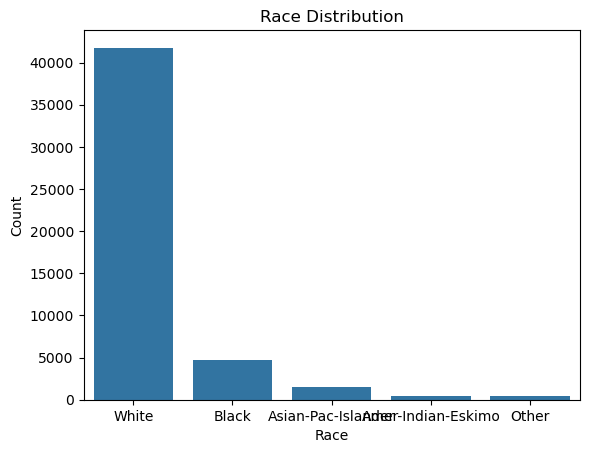

In [20]:
sns.countplot(x= 'race', data=adult_data)
plt.title("Race Distribution")
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

In [21]:
adult_data["race"].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

As we can see, the race distribution is skewed towards white

### Sex

Text(0, 0.5, 'Count')

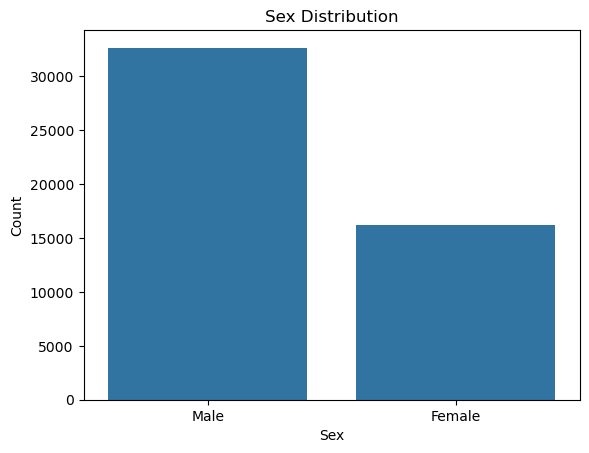

In [22]:
sns.countplot(x = 'sex', data=adult_data)
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")

In [23]:
adult_data["sex"].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

As we can see the assumption from before doesn't hold up, since most of the data entries are men.

### Capital-gain

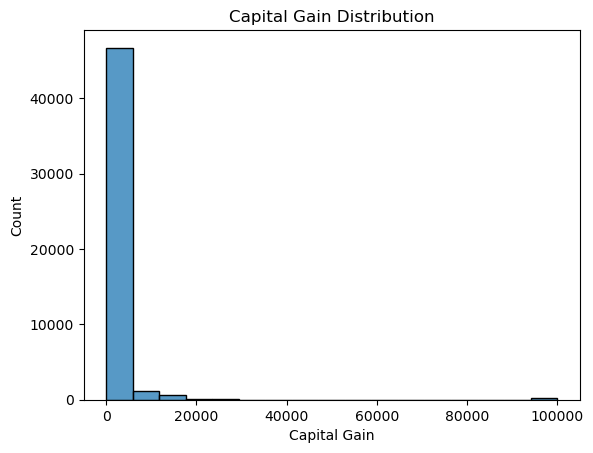

In [24]:
sns.histplot(x = "capital-gain", data = adult_data)
plt.title("Capital Gain Distribution")
plt.xlabel("Capital Gain")
plt.ylabel("Count")
plt.show()

In [25]:
adult_data["capital-gain"].describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

It's very unclear and the data doesn't say much other than a small percentage of people have gotten a capital gain.

### Capital-loss

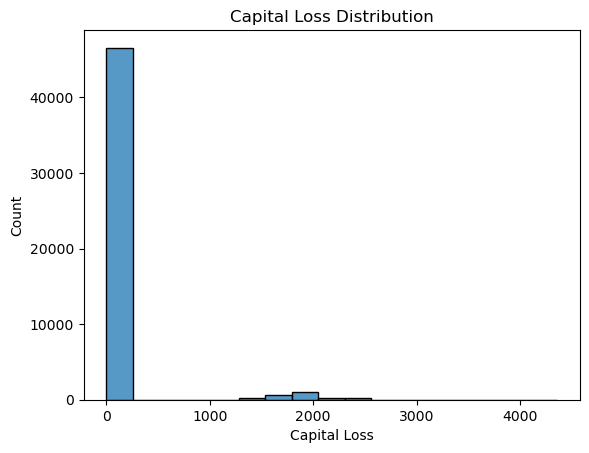

In [26]:
sns.histplot(x = "capital-loss", data = adult_data)
plt.title("Capital Loss Distribution")
plt.xlabel("Capital Loss")
plt.ylabel("Count")
plt.show()

In [27]:
adult_data["capital-loss"].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

We see the same result as above, the data doesn't say much. But the majority of the data entries didn't have a capital loss

### Hours-per-week

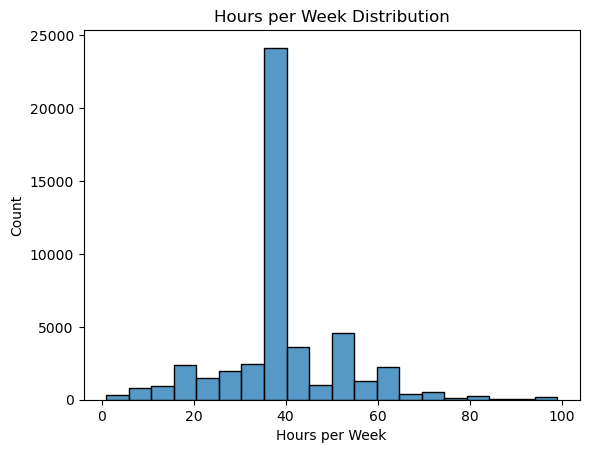

In [28]:
sns.histplot(x = "hours-per-week", data = adult_data, bins = 20)
plt.title("Hours per Week Distribution")
plt.xlabel("Hours per Week")
plt.ylabel("Count")
plt.show()

In [29]:
adult_data["hours-per-week"].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

As we can see the mean is 40.42 which is really close to the median 40.00. So the data is not skewed too much.

### Native-country

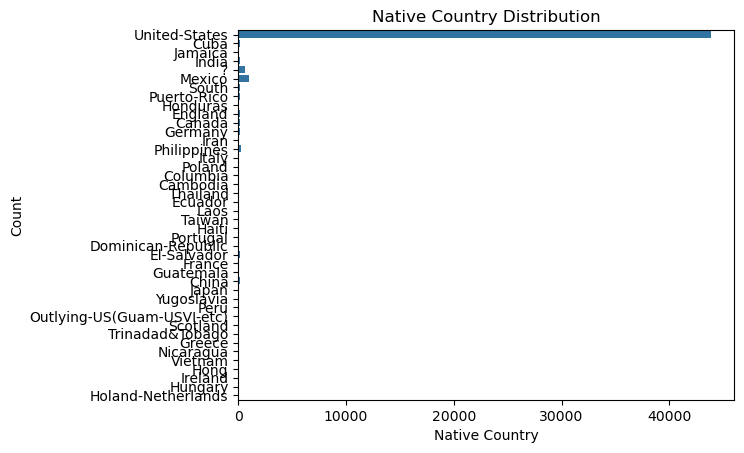

In [30]:
sns.countplot(y = "native-country", data = adult_data)
plt.title("Native Country Distribution")
plt.xlabel("Native Country")
plt.ylabel("Count")
plt.show()

In [31]:
adult_data["native-country"].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

There's a lot of variety in the native-country, but most are Americans

### Income

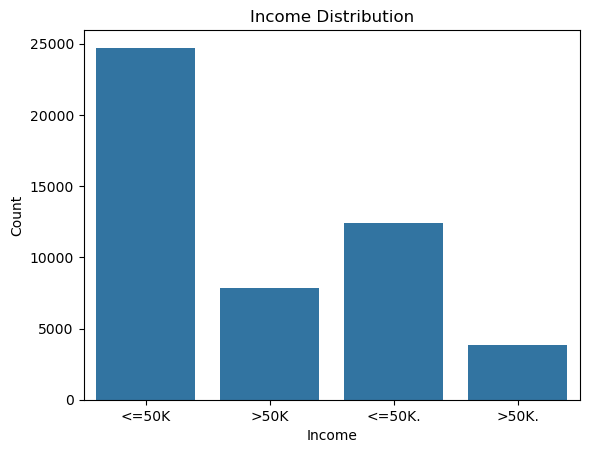

In [32]:
sns.countplot(x = "income", data = adult_data)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

As we can see, the "<=50K" is the same as "<=50K." and same goes for the ">50K.". So we wanna transform them to only have 2 columns

In [33]:
print("before cleaning", adult_data["income"].unique())

before cleaning ['<=50K' '>50K' '<=50K.' '>50K.']


In [34]:
adult_data["income"] = adult_data["income"].str.strip().str.replace(r'\.', '', regex=True)

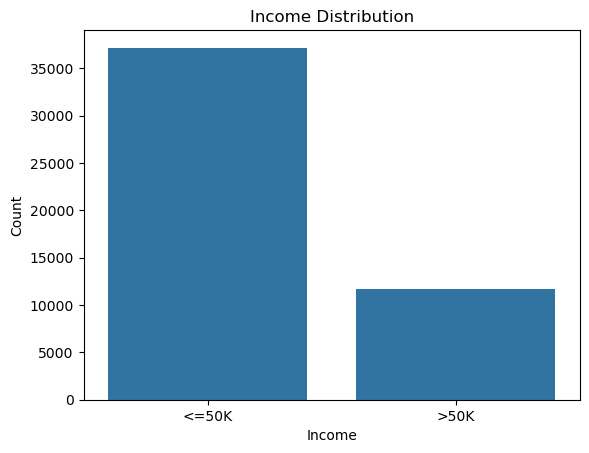

In [35]:
sns.countplot(x = "income", data = adult_data)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

In [36]:
adult_data["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Here we can see that most people in this dataset makes 50K or above

### Finally, you should investigate/explain the variation/correlation between pairs of variables – here it is enough to investigate three pairs of variables, one where both variables are categorical, one where both variables are numeric, and one where one of the variable is categorical and the other is numeric. 

### Both Categorial Variables

We've chosen to take `race` and `income`

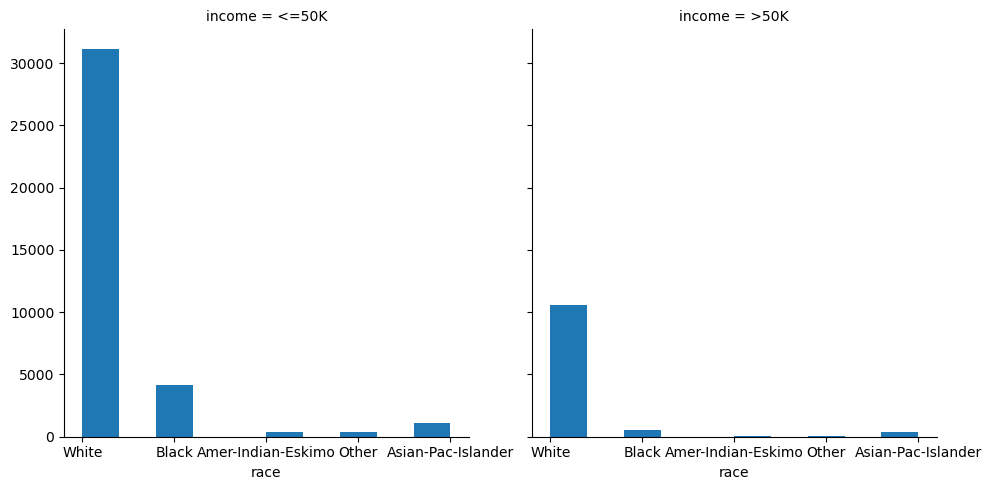

In [37]:
g=sns.FacetGrid(adult_data, col='income', height=5)
g.map(plt.hist, 'race')
plt.show()

It's difficult to really gauge what this says about the correlation, since it's mostly white people that are in the data. So it's tough to say anything about skewment of the data 

### Categorial and Numeric Variables

We've chosen to take the `hours-per-week` and `sex`to see if there's any correlation

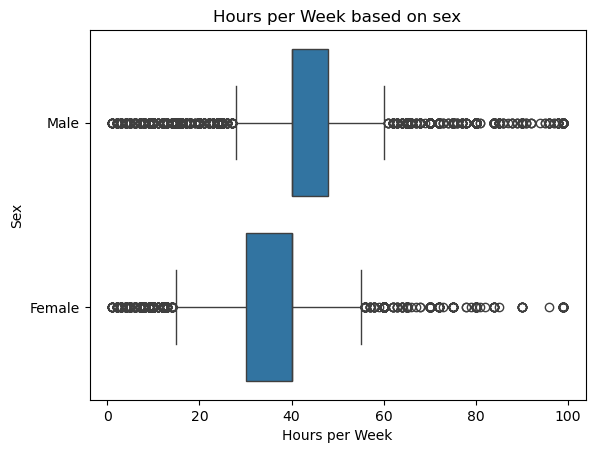

In [38]:
# taking a look at the correlation between the features hours-per-week and sex

sns.boxplot(x = 'hours-per-week', y = 'sex', data = adult_data)
plt.title("Hours per Week based on sex")
plt.xlabel("Hours per Week")
plt.ylabel("Sex")
plt.show()


Looking at the boxplot, it looks like men is working more on average. But we have to take into account that the participants were  around 66% men and 33% female.

### Both Numeric Variables

We've decided to choose `age` and `education-number` with the thought process that the older you are, the higher the education

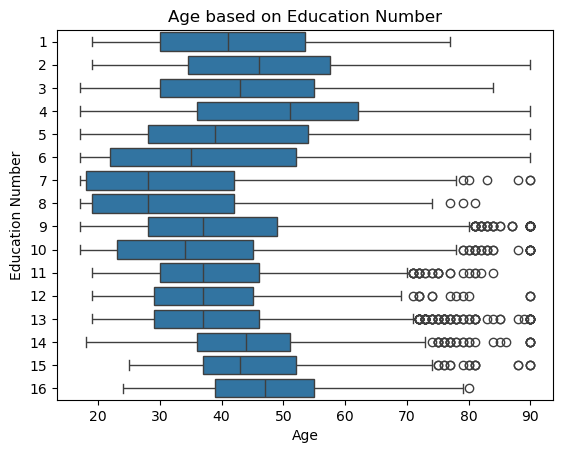

In [39]:
# Taking a look at the correlation between the features age and education-num

sns.boxplot(x = 'age', y = 'education-num', data = adult_data, orient = 'h')
plt.title("Age based on Education Number")
plt.xlabel("Age")
plt.ylabel("Education Number")
plt.show()